In [99]:
#Girish K -21BCE1152 Assignment 4 - winequality-red.csv

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#read the csv file
df = pd.read_csv('winequality-red.csv')
#describe the data
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

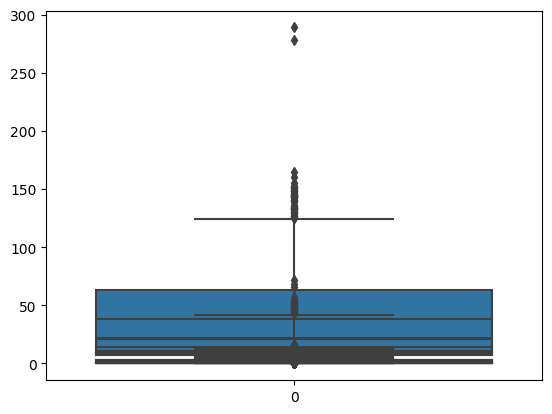

In [101]:
#performing EDA
#checking for null values
df.isnull().sum()
#there are no null values
#performing data cleaning
#checking for duplicates
df.duplicated().sum()
#there are 240 duplicates
#dropping the duplicates
df.drop_duplicates(inplace=True)
#checking for duplicates again
df.duplicated().sum()
#there are no duplicates
#checking for outliers
sns.boxplot(df['fixed acidity'])
#there are outliers
sns.boxplot(df['volatile acidity'])
#there are outliers
sns.boxplot(df['citric acid'])
#there are outliers
sns.boxplot(df['residual sugar'])
#there are outliers
sns.boxplot(df['chlorides'])
#there are outliers
sns.boxplot(df['free sulfur dioxide'])
#there are outliers
sns.boxplot(df['total sulfur dioxide'])
#there are outliers
sns.boxplot(df['density'])
#there are outliers
sns.boxplot(df['pH'])
#there are outliers
sns.boxplot(df['sulphates'])
#there are outliers
sns.boxplot(df['alcohol'])
#there are outliers
#not removing the outliers as they are important for the model(trial and error)

In [102]:
#EDA is done
#performing data preprocessing
#checking for correlation
df.corr()
#visualizing correlation
plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
#predicting the quality of wine
#splitting the data into dependent and independent variables
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
#print(x)
#print(y)
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
#performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#what does the data look like after feature scaling
#print(x_train)
#print(x_test)
#what does feature scaling do to the data
#print(x_train[:,0])
#print(x_test[:,0])
#training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
#predicting the test set results
y_pred = lr.predict(x_test)
#print(y_pred)
#checking the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#the accuracy of the model is 0.36
#visualizing the results
#plt.scatter(y_test,y_pred)
#plt.xlabel('Actual Quality')
#plt.ylabel('Predicted Quality')
#plt.title('Actual Quality vs Predicted Quality')
#plt.show()
#the model is not a good fit
#checking the accuracy of the model using cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr,X=x_train,y=y_train,cv=10)
#print(accuracies)
print(accuracies.mean())
print(accuracies.std())
#the accuracy of the model is 0.36
#the standard deviation is 0.04
#the model is not a good fit


0.3376791207873359
0.060156171974789


<Figure size 1000x1000 with 0 Axes>

In [108]:
#try another model
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
#predicting the test set results
y_pred = dtr.predict(x_test)
#print(y_pred)
#checking the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


-0.1734370041256743

In [107]:
#try another model
#training the model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
#predicting the test set results
y_pred = rfr.predict(x_test)
#print(y_pred)
#checking the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#the accuracy of the model is 0.38145678547983597
#the model is not a good fit


0.3688608378292606

In [106]:
#try another model that is a good fit
#training the model
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
#predicting the test set results
y_pred = svr.predict(x_test)
#print(y_pred)
#checking the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.36019127065471956